In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [9]:
import json

In [10]:
with plt.style.context(('accurat')):
    fig = plt.figure()

In [13]:
d = json.loads(open("data.json","r").read())
d

[{'ages': [23],
  'alive': False,
  'death_age': 50,
  'name': 'Carson McCullers',
  'ranks': [17],
  'titles': ['Columbus']},
 {'ages': [25],
  'alive': False,
  'death_age': 84,
  'name': 'Norman Mailer',
  'ranks': [51],
  'titles': ['Long Branch']},
 {'ages': [27, 30],
  'alive': False,
  'death_age': 62,
  'name': 'Ernest Hemingway',
  'ranks': [45, 74],
  'titles': ['Oak Park']}]

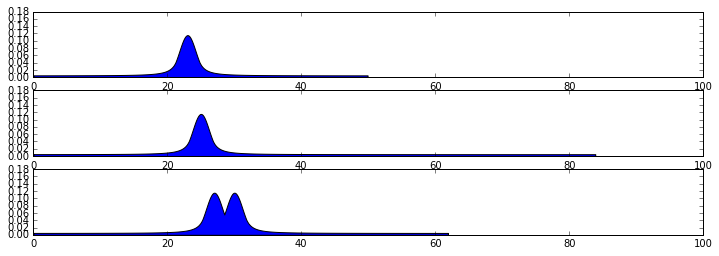

In [45]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([.2,.2,.7,.7])

for i,author in enumerate(d):
    x = np.arange(0,author["death_age"],.1)
    smoothed = np.zeros(len(x))
    ax = plt.subplot(len(d),1,i+1)
    for year in author["ages"]:
        for sigma in np.linspace(1.2,20,num=100):
            y = .005+1/(2*np.pi*(sigma**2))*np.exp(-(x - year)**2/(2*(sigma**2)))
            smoothed = np.maximum(smoothed,y)
    ax.fill_between(x,np.zeros(len(x)),smoothed)
    ax.set_ylim([0,.18])
    ax.set_xlim([0,100])